In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import random

def build_empty_signal(n, sr):
    t = np.arange(n) / sr
    x = np.zeros(n)
    return x, t

def gauss_sig(x, t, std_min, std_max, amp_min, amp_max, num_pulses, std_length):
    signal_length = len(x)
    
    for _ in range(num_pulses):
        std = np.random.uniform(std_min, std_max)
        amp = np.random.uniform(amp_min, amp_max)
        
        window_length = int(2 * std_length * std)  # Ensure the window length is odd
        if window_length % 2 == 1: window_length -= 1
                
        window = signal.windows.gaussian(window_length, std=std)
        window = amp*window
        
        
        pos = np.random.randint(window_length, signal_length-window_length//2)
        
        start = pos - (window_length // 2) 
        end = pos + (window_length // 2 )
        
        
        window_segment = window[:end - start]  # Adjust the length of the window segment
        x[start:end] += window_segment

    return x

In [2]:
# generate noise in frequency domain of length n, sample rate sr

def generate_random_complex(real_min, real_max, imag_min, imag_max):
    real = random.uniform(real_min, real_max)
    imag = random.uniform(imag_min, imag_max)
    return complex(real, imag)
    
def gen_noise_freq(N = 2000):
    n_freq = N//4
    
    # sample uniformly from low frequency range and high frequency range
    percentile_freq = 0.05
    low_freq_range = list(range(int(n_freq*percentile_freq), int(n_freq*percentile_freq*2)))
    high_freq_range = list(range(int(n_freq*(1-percentile_freq*2)),int(n_freq*(1-percentile_freq))))
    num_freqs = 10
    real_min, real_max, imag_min, imag_max = -10, 10, -10, 10
    
    low_freqs = random.sample(low_freq_range, num_freqs)
    high_freqs = random.sample(high_freq_range, num_freqs)
    
    # construct the signal and give them random amplitude
    noise_sig = np.zeros(n_freq, dtype=np.complex_)
    for freq in low_freqs+high_freqs:
        noise_sig[freq] = generate_random_complex(real_min, real_max, imag_min, imag_max)
        
    noise_sig += 1e-10  # shift up to avoid computation problems
    noise_sig = np.concatenate((noise_sig[::-1], noise_sig))
    
    return noise_sig, np.fft.irfft(noise_sig)

Text(0.5, 1.0, 'frequency spectrum')

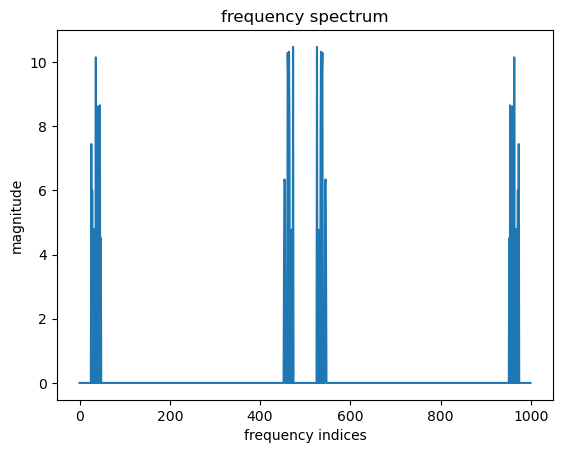

In [3]:
noise_sig_freq, noise_sig_time = gen_noise_freq()
plt.plot(abs(noise_sig_freq))
plt.xlabel("frequency indices")
plt.ylabel("magnitude")
plt.title("frequency spectrum")

Text(0.5, 1.0, 'time spectrum')

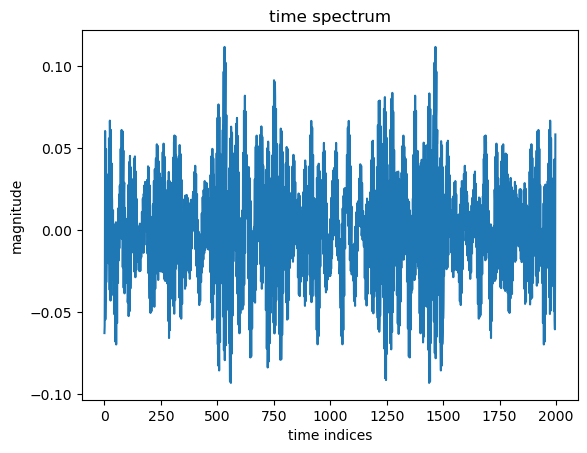

In [4]:
plt.plot(noise_sig_time)
plt.xlabel("time indices")
plt.ylabel("magnitude")
plt.title("time spectrum")

Text(0.5, 1.0, 'time spectrum')

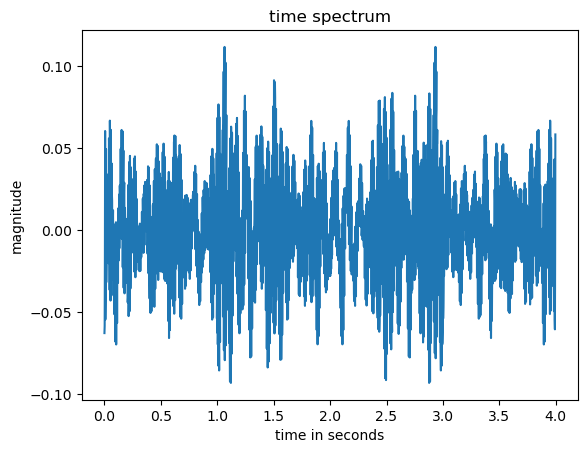

In [5]:
# for T = 2, SR = 1000
T = 4
SR = 500
x = np.linspace(0,T,T*SR)[:len(noise_sig_time)]
plt.plot(x, noise_sig_time)
plt.xlabel("time in seconds")
plt.ylabel("magnitude")
plt.title("time spectrum")

In [6]:
signal_len = 2  # seconds
sr = 2500  # sample rate

noise_sig_freq, noise_sig_time = gen_noise_freq(n)

plt.plot(np.abs(noise_sig_freq))
plt.show()
plt.plot(noise_sig_time)

NameError: name 'n' is not defined

In [ ]:
# power spectral density
from scipy.signal import welch

fs = 1000
psd = (1 / (fs * len(noise_sig_time))) * np.abs(noise_sig_freq) ** 2

plt.plot(np.log(psd))
plt
# plt.plot()

amp:  (2000,)
fft:  (1001,)


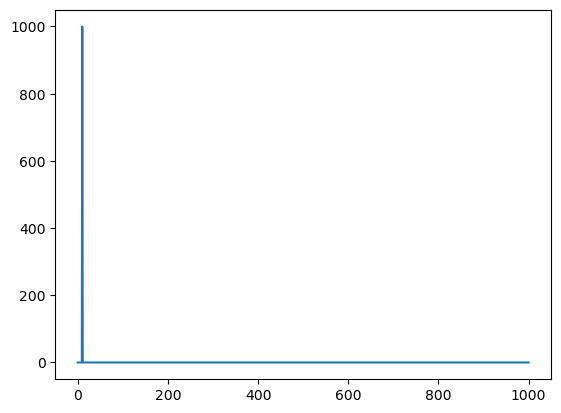

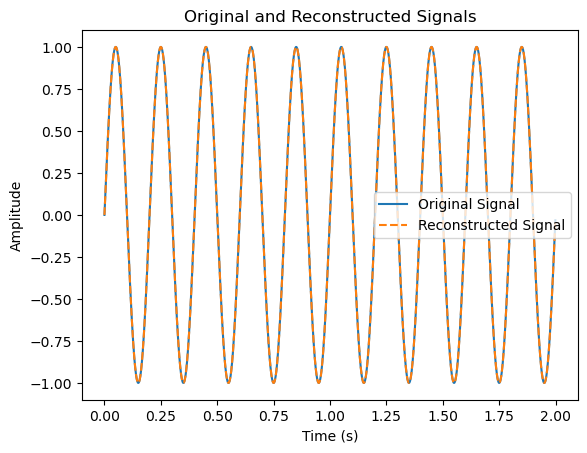

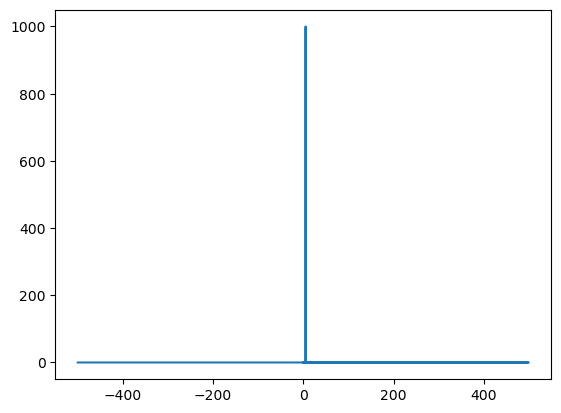

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Create a sample real-valued time-domain signal
sampling_rate = 1000  # Hz
duration = 2.0  # seconds
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
frequency = 5  # Hz
amplitude = np.sin(2 * np.pi * frequency * t)  # Sine wave
print("amp: ", amplitude.shape)

# Compute the FFT using rfft
fft_values = np.fft.rfft(amplitude)
print("fft: ", fft_values.shape)
fft_freqs = np.fft.fftfreq(len(amplitude), 1/sampling_rate)
plt.plot(abs(fft_values))
plt.show()
# Perform the inverse FFT using irfft
reconstructed_signal = np.fft.irfft(fft_values)

# Plot the original and reconstructed signals to compare
plt.plot(t, amplitude, label="Original Signal")
plt.plot(t, reconstructed_signal, linestyle='--', label="Reconstructed Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Original and Reconstructed Signals")
plt.show()

plt.plot(fft_freqs[:len(amplitude)//2+1], abs(fft_values))

10
[10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.  14.5 15.  15.5 16.  16.5
 17.  17.5 18.  18.5 19.  19.5 20.  20.5 21.  21.5 22.  22.5 23.  23.5
 24.  24.5]


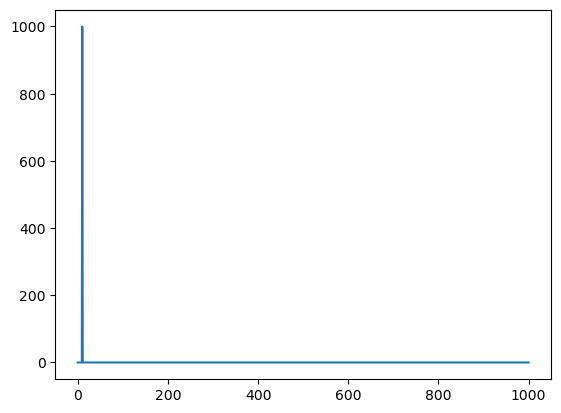

In [8]:
print(np.argmax(abs(fft_values)))
print(fft_freqs[20:50])
plt.plot(abs(fft_values))

In [9]:
# Generate a sample signal
fs = 1000  # Sampling frequency in Hz
T = 5  # Total duration in seconds
time = np.arange(0, T, 1/fs)  # Time vector
freq = 50  # Frequency of the signal in Hz

# Create a sine wave with some noise
signal = np.sin(2 * np.pi * freq * time) + 0.5 * np.random.randn(len(time))

# Compute Power Spectral Density (PSD) using Welch's method
frequencies, psd = welch(signal, fs, nperseg=1024)

# Plot the PSD
plt.figure(figsize=(8, 5))
plt.plot(frequencies, psd, color='blue', label='Power Spectral Density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectral Density (PSD)')
plt.grid(True)
plt.legend()
plt.show()

NameError: name 'welch' is not defined

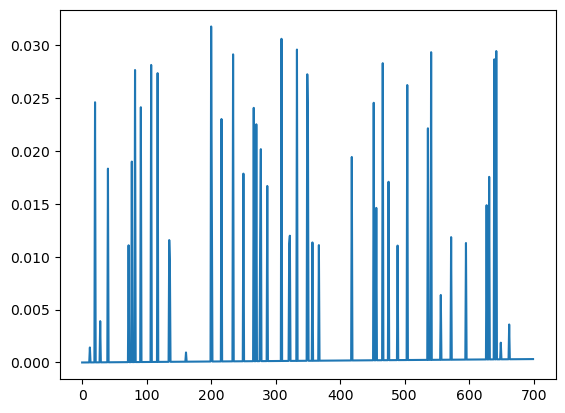

[-0.9976025 -0.06920446j  0.39731896-0.91768058j -0.58190482+0.8132569j
 -0.11985623+0.99279126j  0.57473199+0.8183417j ]


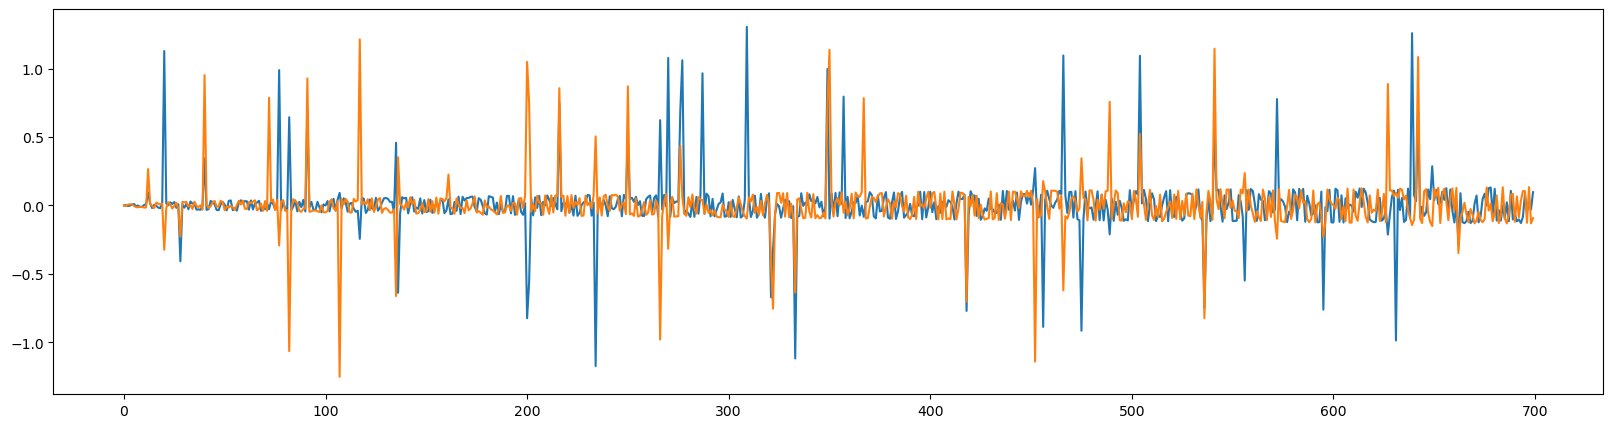

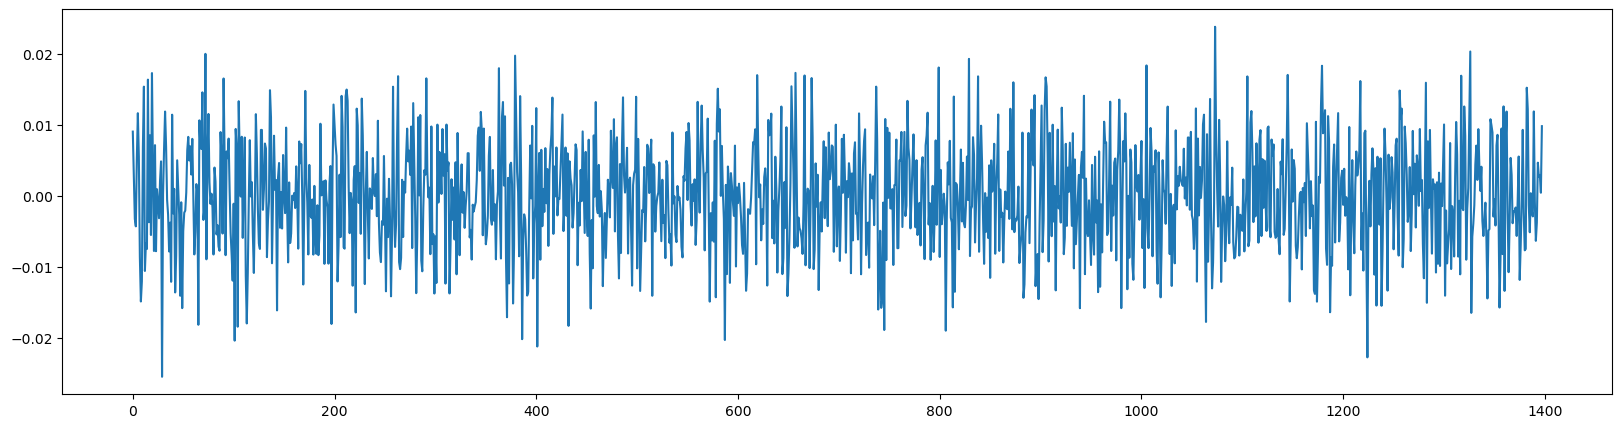

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# generate time series noise from psd
sr = 2^5
n = 2^10

# generate psd, assuming some binning(anything)
largest_frequency = 1000
num_bins = 700
freqs = np.linspace(0, largest_frequency, num_bins)

# generate spikes of noise
num_spikes = 10
psd = np.zeros(num_bins)

# generate a power density spectrum of some function
def f(x): return x**2
    
def f2(x, num_spikes):
    # x = 5*x**2
    for i in range(num_spikes):
        index = np.random.randint(0,len(x))
        magnitude = x[index] + np.random.randint(1000,100000)
        x[index] += magnitude
    return x

psd += f2(freqs, 50)
psd = psd/psd.sum()

plt.plot(psd)
plt.show()

# convert to frequency spectrum
freq_spectrum = np.sqrt(psd * sr * n)
random_phase = np.exp(1j * np.random.uniform(0, 2 * np.pi, len(freq_spectrum)))
freq_spectrum = random_phase * freq_spectrum
print(random_phase[:5])

plt.figure(figsize=(20, 5))
plt.plot(np.real(freq_spectrum))
plt.plot(np.imag(freq_spectrum))
plt.show()

plt.figure(figsize=(20, 5))
time_signal = np.fft.irfft(freq_spectrum)
plt.plot(time_signal)


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# generate time series noise from psd
sr = 2**5
n = 2**10

# generate psd, assuming some binning(anything)
largest_frequency = 1000
num_bins = 700
freqs = np.linspace(0, largest_frequency, num_bins)

# generate spikes of noise
num_spikes = 10
psd = np.zeros(num_bins)

# generate a power density spectrum of some function
def f(x): return x**2


'''
f2 returns PSD of a custom functional form (here using x^2 + a fixed number of delta functions)
x: frequency bins
num_spikes: number of delta functions
'''
def f2(x, num_spikes):
    x = 5*x**2   # f(x) ~ x^2
    '''
    for i in range(num_spikes):
        index = np.random.randint(0,len(x))  # pick a random bin
        magnitude = x[index] + np.random.randint(1000,100000)  # add a spike of random amplitude
        x[index] += magnitude
    '''
    return x

def generate_time_from_psd(n, sr, largest_frequency, num_bins, f, f_kwargs):
    
    freqs = np.linspace(0, largest_frequency, num_bins)
    psd = np.zeros(num_bins)
    
    psd += f(freqs, **f_kwargs)
    psd = psd/psd.sum()
    
    # plt.plot(psd)
    # plt.show()
    
    # convert to frequency spectrum
    freq_spectrum = np.sqrt(psd * sr * n)
    random_phase = np.exp(1j * np.random.uniform(0, 2 * np.pi, len(freq_spectrum)))
    freq_spectrum = random_phase * freq_spectrum
    
    # plt.figure(figsize=(20, 5))
    # plt.plot(np.real(freq_spectrum))
    # plt.plot(np.imag(freq_spectrum))
    # plt.show()
    
    # plt.figure(figsize=(20, 5))
    time_signal = np.fft.irfft(freq_spectrum)
    # plt.plot(time_signal)
    
    return psd, freq_spectrum, time_signal
    
psd, freq_spectrum, time_signal = generate_time_from_psd(n, sr, largest_frequency, num_bins, f2, {"num_spikes":10})

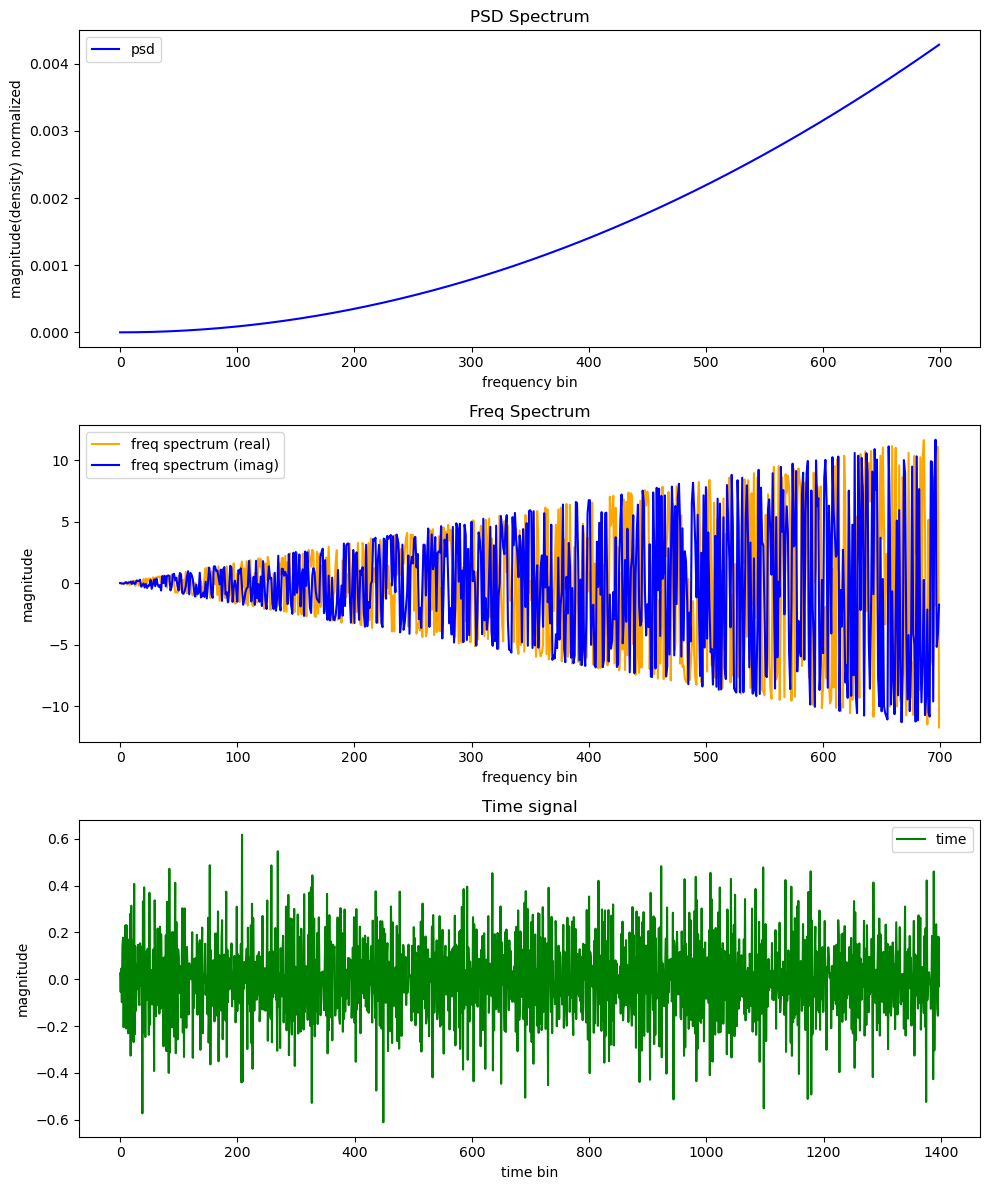

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Plot each dataset on its own axis
ax1.plot(psd, color="blue", label="psd")
ax1.set_xlabel("frequency bin")
ax1.set_ylabel("magnitude(density) normalized")
ax1.set_title("PSD Spectrum")
ax1.legend()

ax2.plot(np.real(freq_spectrum), color="orange", label="freq spectrum (real)")
ax2.plot(np.imag(freq_spectrum), color="blue", label="freq spectrum (imag)")
ax2.set_title("Freq Spectrum")
ax2.set_xlabel("frequency bin")
ax2.set_ylabel("magnitude")
ax2.legend()

# To avoid very large values, restrict the y-axis range for the tangent plot
ax3.plot(time_signal, color="green", label="time")
ax3.set_title("Time signal")
ax3.set_ylabel("magnitude")
ax3.set_xlabel("time bin")
ax3.legend()

# Display the plots
plt.tight_layout()
plt.show()

In [19]:
sr = 2^5
n = 2^10
max_frequency = 1000
bin_size = 700  # each bin would represent 10/7 Hz   
sr

7